# "Nice" impedance that should resemble total FCC impedance, but without sharp features, etc

In [1]:
# import from Python Scripts
homefolder = 'D:/Mein flash drive/CERN_Science/2018/13 - PyImpedanceBudget/'
from PythonScripts.Machine import Machine
from PythonScripts.ImpWake import ImpWake
from PythonScripts.Model import *

In [2]:
# input parameters
scenariotitle = 'Nice impedance model'
scenariofolder = homefolder + 'ImpedanceScenarios/Total/Nice impedance/'
paramfile = 'Params/FCC-hh_injection.dat'
energy_string = '3p3TeV'

In [3]:
# Define impedance model at injection
machine = Machine(homefolder + paramfile) # define machine
impwake = ImpWake(scenariofolder, energy_string) #define impedance-wake
model = Model(machine, impwake) # define the whole impedance model

Impedance model created


In [4]:
# define a sample impedance (resistive wall)
import numpy as np
f = np.logspace(0, 14, 40 * 14 + 1)
Zydip = 5.45e10 * (1+1j) / np.sqrt(f)
model._impwake._f_y = f
model._impwake._Zydip = Zydip

# add a sample broadband resonator impedance
f_res = 1e9
Rw_y = 6e6
Q = 1
Npeak = 500
Nbroadband = 500
model._impwake.addResonatorImpedance('y', f_res, Rw_y, Q, Npeak, Nbroadband)


# append zero frequency to impedance
model._impwake.addZeroFrequencyToImpedance(['y'])

# save to file
model._impwake.saveImpedance(['y'])

Contribution is added to vertical impedance
Zero frequency is added to vertical impedance
Impedance in y plane is saved


Impedance model created
Vertical impedance set from file D:/Mein flash drive/CERN_Science/2018/13 - PyImpedanceBudget/ImpedanceScenarios/Total/Total_impedance_Mar_2018/Impedance and wake data/Zydip_3p3TeV.dat
Vertical impedance set from folder D:/Mein flash drive/CERN_Science/2018/13 - PyImpedanceBudget/ImpedanceScenarios/Total/Total_impedance_Mar_2018/Impedance and wake data/


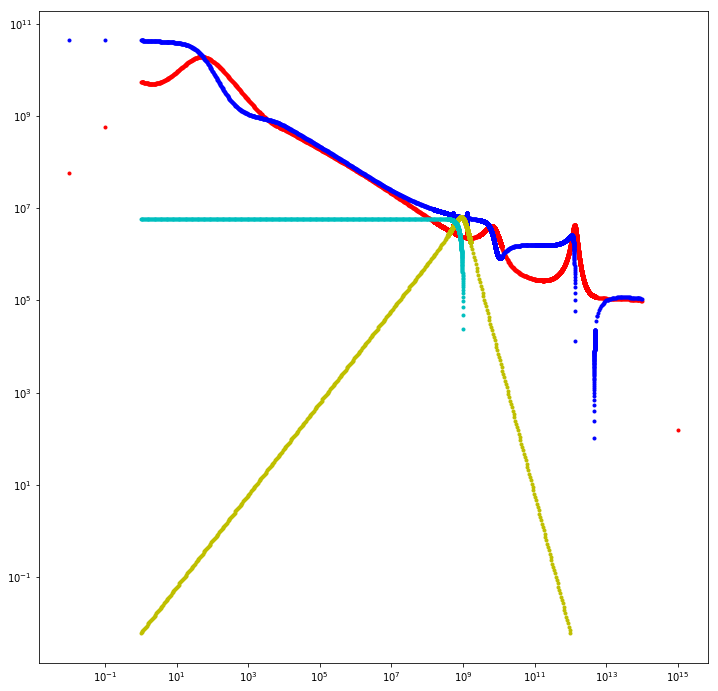

In [5]:
# compare to the actual FCC impedance
%matplotlib inline
import mpld3
mpld3.enable_notebook()
from matplotlib import pyplot as plt

# import actual impedance
scenariofolder_actual = homefolder + 'ImpedanceScenarios/Total/Total_impedance_Mar_2018/'
machine_actual = Machine(homefolder + paramfile) # define machine
impwake_actual = ImpWake(scenariofolder_actual, energy_string) #define impedance-wake
model_actual = Model(machine_actual, impwake_actual) # define the whole impedance model
model_actual._impwake.setLocalImpedance(['y'])


plt.figure(1, figsize=(12, 12))
plt.loglog(model_actual._impwake._f_y, np.real(model_actual._impwake._Zydip), '.r',
           model_actual._impwake._f_y, np.imag(model_actual._impwake._Zydip), '.b',
           model._impwake._f_y, np.real(model._impwake._Zydip), '.y',
           model._impwake._f_y, np.imag(model._impwake._Zydip), '.c')
#plt.xlim([relevant_fmin, relevant_fmax])

In [6]:
# find effective impedances for mode 0 at zero chroma
model.findEffectiveImpedanceTCBI(plane_scan=['y'], shape='gaussian')
model.findEffectiveImpedanceTMCI(plane_scan=['y'], shape='gaussian')

Re(Zeff_TCBI) at  3p3TeV  in  y -plane is 0.00 MOhm/m which corresponds to -745636049717.02 turns rise time
Im(Zeff_TMCI) at  3p3TeV  in  y -plane is 5.41 MOhm/m which corresponds to intensity threshold of 6.45e+11


In [6]:
# create wake files
model._impwake.convertImpedanceToWake(plane_scan=['y'], AreHOMsIncluded=False, relevant_fmin=1e2, 
                                          relevant_fmax=1e10, error=0.01, n_resolved_periods=100)
model._impwake.plotWake(plane_scan=['y'], xscale='logarithmic', yscale='logarithmic', slimits=None, title = scenariotitle)

Calculating  2000  wake points
Wake figure saved


(100.0, 10000000000.0)

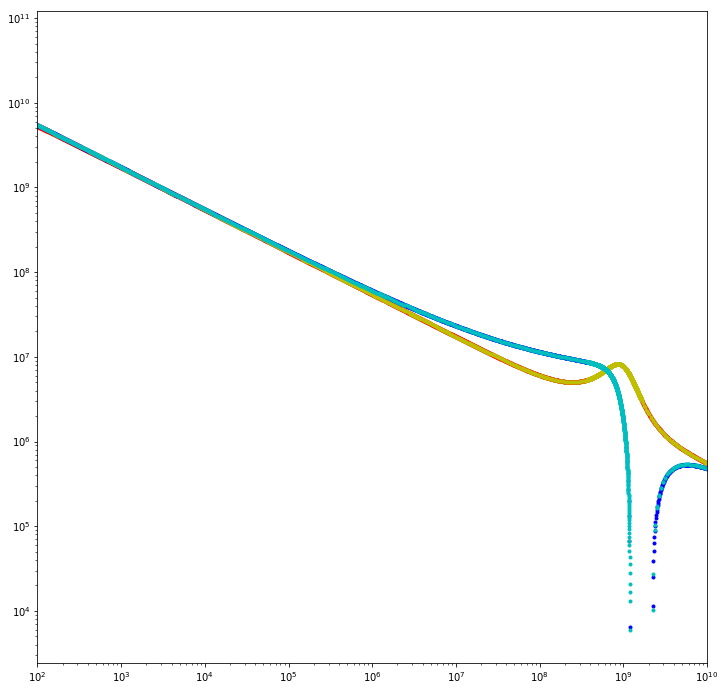

In [8]:
# check that wake files converted back to impedance match the original impedance
%matplotlib inline
import mpld3
mpld3.enable_notebook()
from matplotlib import pyplot as plt

relevant_fmin = 1e2
relevant_fmax = 1e10
restored_f, restored_Z = model._impwake.convertWakeToImpedance('y', relevant_fmin, relevant_fmax)

orig_f = model._impwake._f_y
orig_Z = model._impwake._Zydip
plt.figure(1, figsize=(12, 12))
plt.loglog(restored_f, np.real(restored_Z), '.r', restored_f, np.imag(restored_Z), '.b',
           orig_f, np.real(orig_Z), '.y', orig_f, np.imag(orig_Z), '.c')
plt.xlim([relevant_fmin, relevant_fmax])
